**Data Visualization about Student Performance**

*   Nama : Hanif Naufal Rafandi
*   Kelas : Data Analyst

# **Import Library & Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [ ]:
#Load the Dataset
student = pd.read_csv("/content/drive/MyDrive/File EDA Data Analyst/File CSV/StudentsPerformance.csv")
student.head() # Menampilkan tabel dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Mengganti Nama Kolom**

In [ ]:
# renaming the columns
student.rename(columns={"parental level of education": "parent_education",
                   "test preparation course": "test_prep",
                   "math score": "math_score",
                   "reading score":"reading_score",
                   "writing score": "writing_score"},
                    inplace=True)

# **Menampilkan Informasi & Deskripsi Dataset**

In [ ]:
# Menampilkan informasi dan type data
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race/ethnicity    1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep         1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# change the datatypes of the first 5 rows to category datatype
def changeCategory(*args, dataframe = student):
    # place column names into a list
    myColumns = list(args)

    # use a for loop to change column data types one by one
    for e in myColumns:
        dataframe[e] = dataframe[e].astype("category")

changeCategory("gender","race/ethnicity","parent_education", "test_prep","lunch")

student.dtypes

gender              category
race/ethnicity      category
parent_education    category
lunch               category
test_prep           category
math_score             int64
reading_score          int64
writing_score          int64
dtype: object

In [ ]:
# describe the dataset
student.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **Mengecek data null dan duplikat**

In [ ]:
# No Null Values Present
student.isnull().sum()

gender              0
race/ethnicity      0
parent_education    0
lunch               0
test_prep           0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [ ]:
print(f"Cek Data Duplikat : {student.duplicated().sum()}")

Cek Data Duplikat : 0


# **Klasifikasi Data Gender**

In [ ]:
# Mengelompokkan female & male menjadi gender
student.groupby("gender")["gender"].count()

gender
female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribusi Siswa berdasarkan Gender')

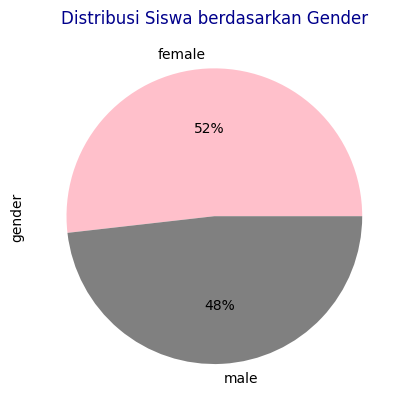

In [ ]:
student.groupby("gender")["gender"].count().plot(kind="pie",autopct='%1.0f%%',colors=["pink","grey"])
plt.title("Distribusi Siswa berdasarkan Gender", color="darkblue")

# **Klasifikasi Nilai Score Siswa**

In [ ]:
# Membuat kolom baru untuk menampung hasil operasi math_score, reading_score, dan writing_score
student["rata_score"] = round((student["math_score"] + student["reading_score"]+ student["writing_score"])/3,1)
student["rata_score"].head()

0    72.7
1    82.3
2    92.7
3    49.3
4    76.3
Name: rata_score, dtype: float64

In [ ]:
# create a grade column that contains the grade of students according to average score
def grade_system(score):
    if score >= 90: return "A+"
    elif score >= 85: return "A"
    elif score >= 80: return "A-"
    elif score >= 75: return "B+"
    elif score >= 70: return "B"
    elif score >= 65: return "B-"
    elif score >= 60: return "C+"
    elif score >= 55: return "C"
    elif score >= 50: return "C-"
    elif score >= 45: return "D+"
    elif score >= 40: return "D"
    elif score >= 35: return "D-"
    else: return "F"

student["nilai"] = student["rata_score"].apply(grade_system)
student["nilai"].head()

0     B
1    A-
2    A+
3    D+
4    B+
Name: nilai, dtype: object

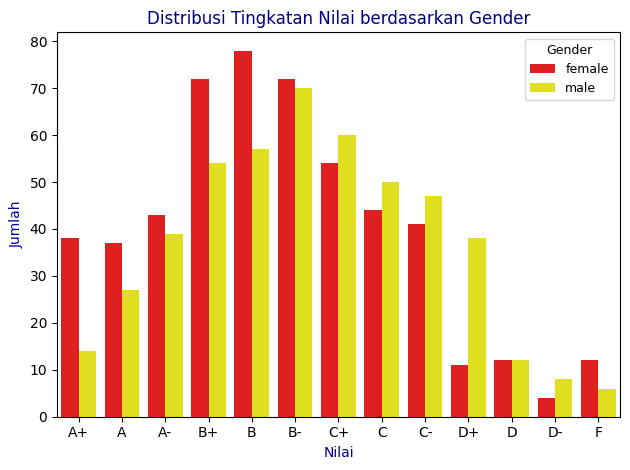

In [ ]:
grade_count = student["nilai"].value_counts()
x_grade_count = grade_count.index
y_grade_count = grade_count.values

# Mengatur palet warna
palette = ["red", "yellow"]
sns.countplot(x = "nilai",
              hue = "gender",
              data = student,
              palette = palette,
              order = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"],)
# Menambahkan legend
plt.legend(title="Gender", title_fontsize=9, fontsize=9)

plt.title("Distribusi Tingkatan Nilai berdasarkan Gender", color="darkblue")
plt.xlabel("Nilai", color="darkblue")
plt.ylabel("Jumlah", color="darkblue")
plt.tight_layout()
plt.show()

# **Klasifikasi Tingkat Kegagalan**

In [ ]:
# creating a status column
student["status"] = student["rata_score"].map(lambda x: "Lolos" if x>=60 else "Gagal")
student["status"].head()

0    Lolos
1    Lolos
2    Lolos
3    Gagal
4    Lolos
Name: status, dtype: object

In [ ]:
passed_failed = student["status"].value_counts()
values = passed_failed.values
labels = passed_failed.index

fig = px.pie(names = labels, values = values, title="Tingkat Kegagalan Performa Siswa berdasarkan Nilai")
fig.show()

# **Klasifikasi Performa Siswa berdasarkan Gender**

In [ ]:
student[["math_score","reading_score","writing_score" ,"gender"]].groupby("gender").mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Figure size 800x400 with 0 Axes>

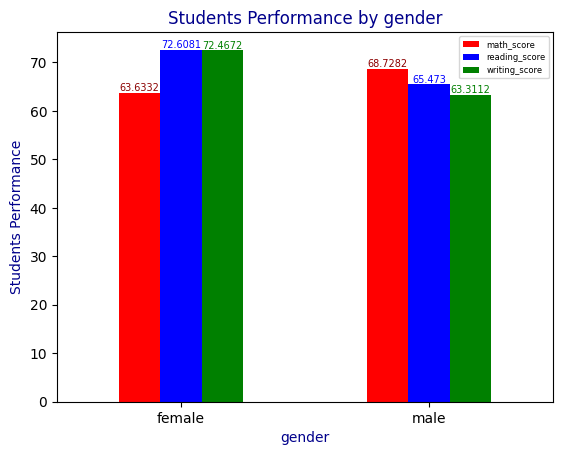

<Figure size 800x400 with 0 Axes>

In [ ]:
ax = student[["math_score","reading_score","writing_score" ,"gender"]].groupby("gender").mean().plot(kind="bar",color=["red","blue","green"],title="student performance by gender", xlabel ="gender", ylabel="score")
plt.xticks(rotation=0)

ax.bar_label(ax.containers[0],color="darkred",fontsize = 7)
ax.bar_label(ax.containers[1],color="blue",fontsize = 7)
ax.bar_label(ax.containers[2],color="green",fontsize = 7)

plt.legend(fontsize = 6, loc='upper right')
plt.title("Students Performance by gender",color="darkblue")
plt.xlabel("gender",color="darkblue")
plt.ylabel("Students Performance",color="darkblue")
plt.figure(figsize=(8, 4))

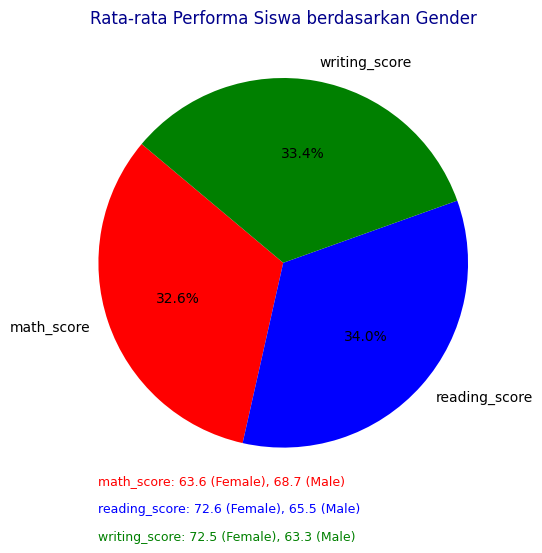

In [ ]:
import matplotlib.pyplot as plt

# Menghitung rata-rata skor berdasarkan gender
mean_scores = student[["math_score", "reading_score", "writing_score", "gender"]].groupby("gender").mean()

# Warna untuk setiap jenis skor
colors = ["red", "blue", "green"]

# Membuat pie chart
plt.figure(figsize=(6, 6))  # Ukuran pie chart
plt.pie(mean_scores.mean(), labels=mean_scores.mean().index, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan label pada setiap bagian pie chart
for i, score_type in enumerate(mean_scores.columns):
    plt.text(-1, -1.2 - i * 0.15, f"{score_type}: {mean_scores[score_type]['female']:.1f} (Female), {mean_scores[score_type]['male']:.1f} (Male)", fontsize=9, color=colors[i])

plt.title("Rata-rata Performa Siswa berdasarkan Gender", color="darkblue")
plt.show()

# **Klasifikasi Performa Siswa berdasrkan Race/ethnicity**

In [ ]:
student[["math_score","reading_score","writing_score", "race/ethnicity"]].groupby("race/ethnicity").mean()

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group A'),
  Text(1, 0, 'group B'),
  Text(2, 0, 'group C'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

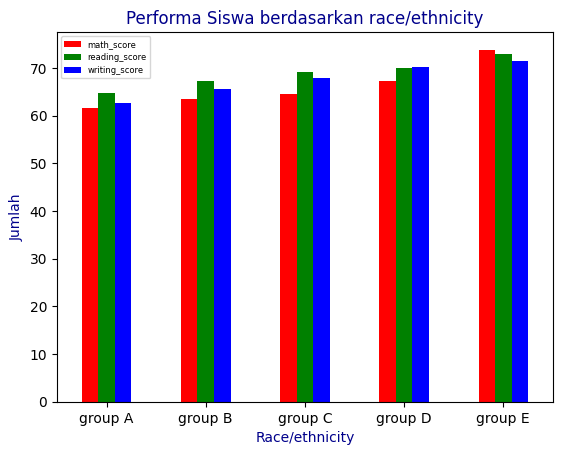

In [ ]:
student[["math_score","reading_score","writing_score", "race/ethnicity"]].groupby("race/ethnicity").mean().plot(kind="bar",color=["red" ,"green","blue"])
plt.legend(fontsize=6)
plt.title("Performa Siswa berdasarkan race/ethnicity",color="darkblue")
plt.xlabel("Race/ethnicity",color="darkblue")
plt.ylabel("Jumlah",color="darkblue")
plt.xticks(rotation=0)

# **Klasifikasi Performa Siswa berdasarkan Parental Level of Education**

In [ ]:
student[["math_score","reading_score","writing_score", "parent_education"]].groupby("parent_education").mean()

,math_score,reading_score,writing_score
parent_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Text(0, 0.5, 'Parental level of education')

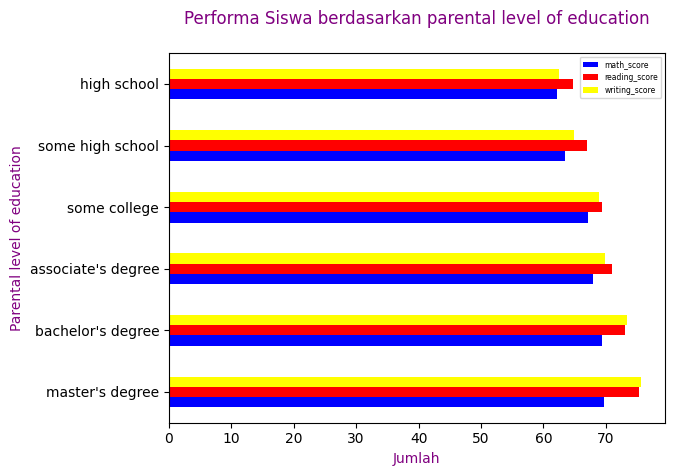

In [ ]:
student[["math_score","reading_score","writing_score", "parent_education"]].groupby("parent_education").mean().sort_values(by="reading_score",ascending =False).plot(kind="barh",color=["blue","red","yellow"])
#plt.figure(figsize=(20,20),label=False)
plt.legend(fontsize=5.5)
plt.title("Performa Siswa berdasarkan parental level of education\n",color="purple")
plt.xlabel("Jumlah",color="purple")
plt.ylabel("Parental level of education",color="purple")

# **Klasifikasi Performa Siswa berdasarkan Test Preparation Course**

In [ ]:
student[["math_score","reading_score","writing_score", "test_prep"]].groupby("test_prep").mean()

,math_score,reading_score,writing_score
test_prep,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


(array([0, 1]), [Text(0, 0, 'completed'), Text(1, 0, 'none')])

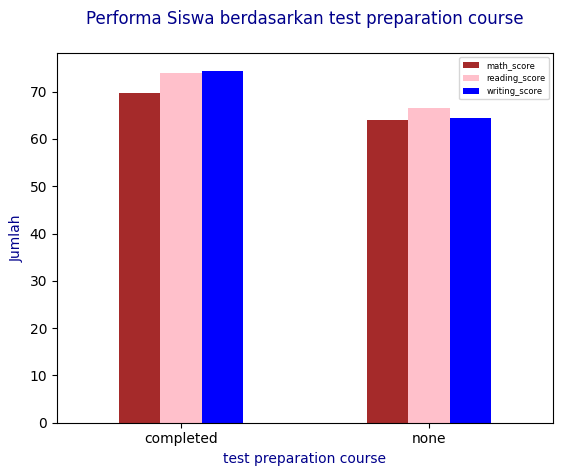

In [ ]:
student[["math_score","reading_score","writing_score", "test_prep"]].groupby("test_prep").mean().sort_values(by="reading_score",ascending =False).plot(kind="bar",color=["brown","pink","blue"])
#plt.figure(figsize=(20,20),label=False)
plt.legend(fontsize=6)
plt.title("Performa Siswa berdasarkan test preparation course\n",color ="darkblue")
plt.xlabel("test preparation course",color ="darkblue")
plt.ylabel("Jumlah",color ="darkblue")
plt.xticks(rotation=0)

# **Klasifikasi Performa Siswa berdasarkan Lunch**

In [ ]:
student[["math_score","reading_score","writing_score", "lunch"]].groupby("lunch").mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


(array([0, 1]), [Text(0, 0, 'standard'), Text(1, 0, 'free/reduced')])

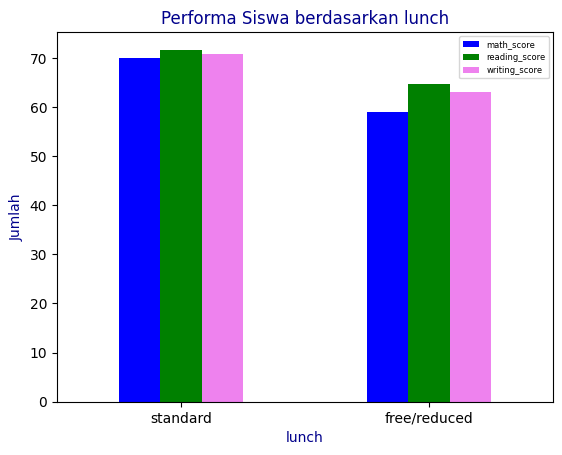

In [ ]:
student[["math_score","reading_score","writing_score", "lunch"]].groupby("lunch").mean().sort_values(by="reading_score",ascending =False).plot(kind="bar",color=["blue","green","violet"])
#plt.figure(figsize=(20,20),label=False)
plt.legend(fontsize=6)
plt.title("Performa Siswa berdasarkan lunch",color="darkblue")
plt.xlabel("lunch",color="darkblue")
plt.ylabel("Jumlah",color="darkblue")
plt.xticks(rotation=0)